# Convolutional Neural Networks
This notebook will guide you through the use of the `keras` package to train convolutional neural networks for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998.

## Loading the packages

In [ ]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from sklearn import metrics as me
from scipy import stats

%matplotlib inline

First, create some useful functions

In [ ]:
def build_grid_of_images(array):
    assert len(array.shape) == 3
    dim_0 = np.sqrt(array.shape[0])
    assert dim_0.is_integer()
    
    temp_out = np.reshape(array, (dim_0, dim_0, array.shape[1], array.shape[2]))
    temp_out = np.rollaxis(temp_out, 1, 3)
    return np.reshape(temp_out, (dim_0*array.shape[1], dim_0*array.shape[2]))

def plot_conv_layer_output(temp_out, title):
    temp_to_plot = build_grid_of_images(temp_out)
    pl.imshow(temp_to_plot, interpolation='nearest', cmap=pl.get_cmap('Greys'))
    ax = pl.gca()
    ax.set_xticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[1]))    
    ax.set_yticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[2]))
    pl.grid()
    pl.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    pl.title(title)

def plot_dense_layer_output(temp_out, title):
    pl.bar(np.arange(temp_out.shape[1])-0.4, temp_out[0,:])
    pl.xlim(-0.5, temp_out.shape[1])
    pl.grid()
    pl.title(title)

Load the `mnist` dataset and normalize in the range [0, 1]

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


Create the CNN and show its architecture

In [ ]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(25, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l0 (InputLayer)              (None, 28, 28, 1)         0         
_________________________________________________________________
l1 (Conv2D)                  (None, 28, 28, 9)         234       
_________________________________________________________________
l1_mp (MaxPooling2D)         (None, 14, 14, 9)         0         
_________________________________________________________________
l2 (Conv2D)                  (None, 14, 14, 9)         2034      
_________________________________________________________________
l2_mp (MaxPooling2D)         (None, 7, 7, 9)           0         
_________________________________________________________________
l3 (Conv2D)                  (None, 7, 7, 16)          1312      
_________________________________________________________________
l3_mp (MaxPooling2D)         (None, 3, 3, 16)          0   

Define some constants and train de CNN

In [ ]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.5070 - acc: 0.8485 - val_loss: 0.1832 - val_acc: 0.9470
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.1442 - acc: 0.9559 - val_loss: 0.0949 - val_acc: 0.9687
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0965 - acc: 0.9704 - val_loss: 0.0889 - val_acc: 0.9730
Epoch 4/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0759 - acc: 0.9771 - val_loss: 0.0502 - val_acc: 0.9830
Epoch 5/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0630 - acc: 0.9805 - val_loss: 0.0461 - val_acc: 0.9846
Epoch 6/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0550 - acc: 0.9831 - val_loss: 0.0432 - val_acc: 0.9869
Epoch 7/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0480 - acc: 0.9854 - val_loss: 0.0355 - val_ac

Show the performance of the model

Test score: 0.040625956755731024
Test accuracy: 0.9879


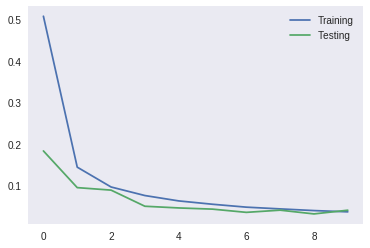

In [ ]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [ ]:
pred = model.predict_on_batch(X_test)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

array([[ 967,    0,    2,    0,    1,    1,    5,    1,    3,    0],
       [   0, 1134,    0,    0,    0,    1,    0,    0,    0,    0],
       [   3,    4, 1017,    0,    0,    0,    3,    4,    1,    0],
       [   1,    0,    1,  997,    0,    5,    0,    2,    4,    0],
       [   0,    0,    0,    0,  980,    0,    0,    0,    2,    0],
       [   1,    0,    0,    3,    0,  885,    2,    1,    0,    0],
       [   0,    1,    0,    0,    0,    1,  956,    0,    0,    0],
       [   0,    5,    3,    0,    0,    0,    0, 1019,    1,    0],
       [   1,    0,    2,    2,    3,    2,    3,    1,  959,    1],
       [   3,    4,    0,    2,   20,    3,    1,    6,    5,  965]])